In [73]:
#Importar librerias necesarias
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest


#Cargar datos desde el csv "My Spotify Library"

url = "https://raw.githubusercontent.com/EQuiSan/Datasets/refs/heads/main/allmymusic.csv"
df = pd.read_csv('allmymusic.csv')
#print(df.head())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track ID          1051 non-null   object 
 1   Track Name        1053 non-null   object 
 2   Album Name        1053 non-null   object 
 3   Artist Name(s)    1052 non-null   object 
 4   Release Date      1051 non-null   object 
 5   Duration          1053 non-null   int64  
 6   Popularity        1053 non-null   int64  
 7   Added By          1053 non-null   object 
 8   Added At          1053 non-null   object 
 9   Genres            962 non-null    object 
 10  Record Label      1053 non-null   object 
 11  Danceability      1051 non-null   float64
 12  Energy            1051 non-null   float64
 13  Key               1051 non-null   float64
 14  Loudness          1051 non-null   float64
 15  Mode              1051 non-null   float64
 16  Speechiness       1051 non-null   float64


In [65]:
#Convertir Duration a segundos
df["Duration"] = df["Duration"]/1000

# nombres de las columnas
columns = ['Danceability', 'Tempo']

# reemplazar valores nulos con "No awards"
for column in columns:
    df[column] = df[column].fillna("0")

In [66]:
#Calcular y presentar estadísticas básicas (media, mediana, moda, desviación estándar).

print("Media de la Duracion: ", df["Duration"].mean())
print("Media de la Popularidad:", df["Popularity"].mean(), "\n")

print("Mediana de Duracion: ", df["Duration"].median())
print("Mediana de Popularidad:", df["Popularity"].median(), "\n")

print("Moda de Duracion: ", df["Duration"].mode().iloc[0])
print("Moda de Popularidad:", df["Popularity"].mode().iloc[0], "\n")

print("Desviación estándar de Duracion: ", df["Duration"].std())
print("Desviación estándar de Popularidad:", df["Popularity"].std(), "\n")

Media de la Duracion:  224.38105508072175
Media de la Popularidad: 33.87274453941121 

Mediana de Duracion:  215.8
Mediana de Popularidad: 37.0 

Moda de Duracion:  143.519
Moda de Popularidad: 0 

Desviación estándar de Duracion:  88.60090752226428
Desviación estándar de Popularidad: 26.208235792473314 



In [67]:
#Crear tablas de frecuencia para al menos una variable.

freq =  df['Artist Name(s)'].value_counts()

print(freq.head())

Artist Name(s)
Sabaton                                         45
Pink Guy                                        33
Calle 13                                        31
Aperture Science Psychoacoustic Laboratories    29
Mick Gordon                                     28
Name: count, dtype: int64


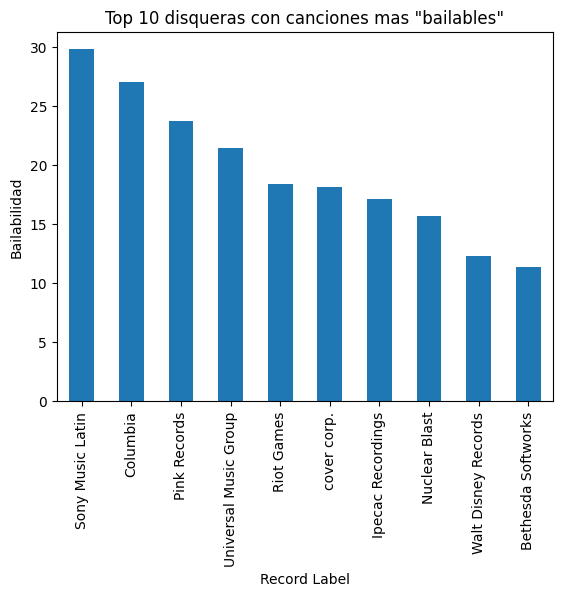

In [74]:
#Mostrar los 10 artistas mas populares
top_5_artists = df.groupby('Record Label')['Danceability'].sum().nlargest(10)
top_5_artists.plot(kind='bar', title='Top 10 disqueras con canciones mas "bailables"')
plt.ylabel('Bailabilidad')
plt.show()

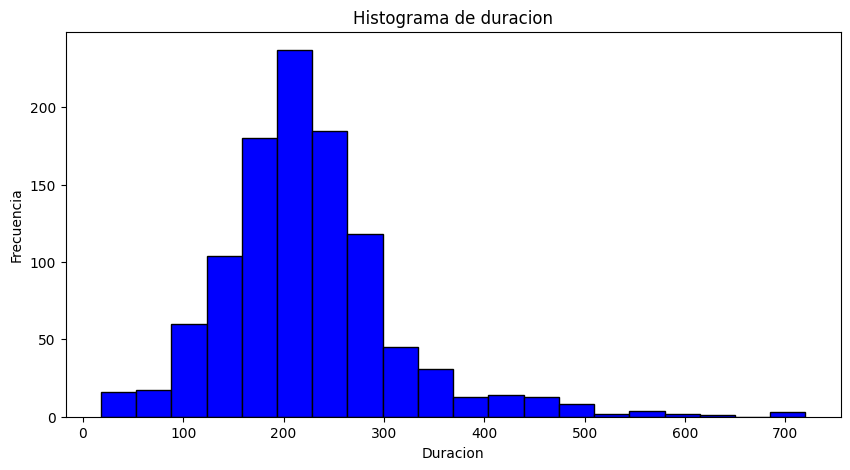

In [55]:
plt.figure(figsize=(10, 5))
plt.hist(df['Duration'].dropna(), bins=20, color='blue', edgecolor='black')
plt.title('Histograma de duracion')
plt.xlabel('Duracion')
plt.ylabel('Frecuencia')
plt.show()

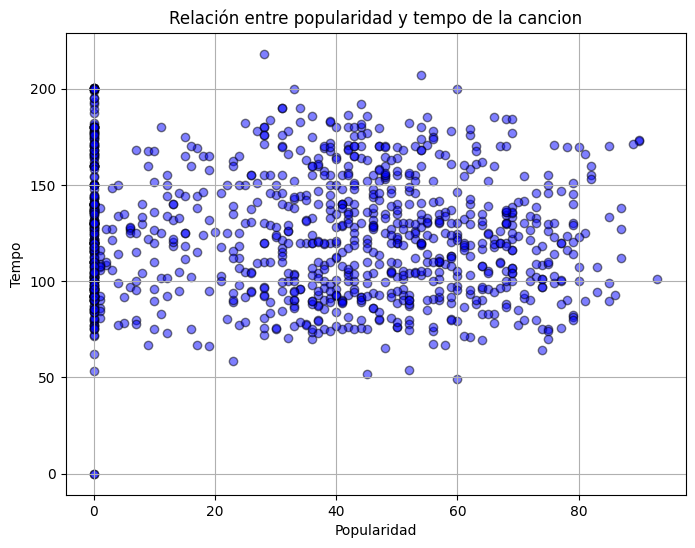

In [61]:
# Diagrama de dispersión entre horas de estudio y puntaje en Matemáticas
plt.figure(figsize=(8,6))
plt.scatter(df['Popularity'], df['Tempo'], alpha=0.5, c='blue', edgecolors='black')
plt.title('Relación entre popularidad y tempo de la cancion')
plt.xlabel('Popularidad')
plt.ylabel('Tempo')
plt.grid(True)
plt.show()

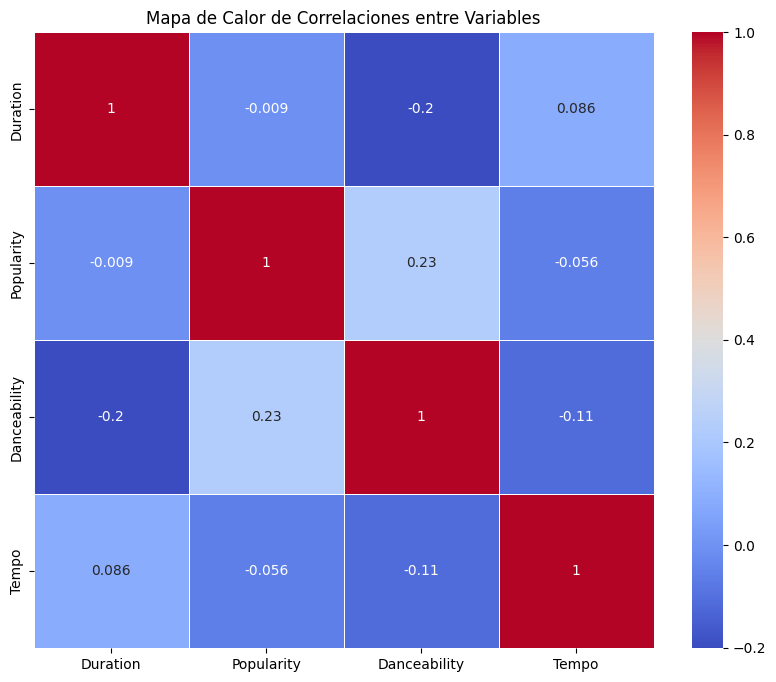

In [60]:
# Crear una matriz de correlación para las variables numéricas
correlation_matrix = df[['Duration', 'Popularity', 'Danceability','Tempo' ]].corr()

# Generar el mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Variables')
plt.show()

Se detectaron 53 anomalías en el dataset.


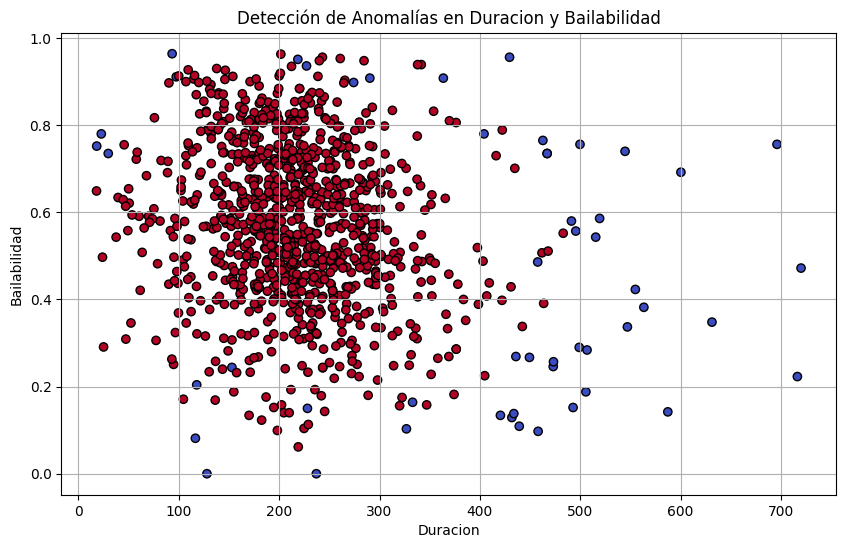

In [63]:
#  Columnas relevantes para la detección de anomalías
X = df[['Duration', 'Popularity', 'Danceability']]

# Aplicar Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% de los datos serán marcados como anomalías
df['Anomaly'] = iso_forest.fit_predict(X)

# Identificar las anomalías (Anomaly == -1)
anomalies = df[df['Anomaly'] == -1]

#  Cuántas anomalías se detectaron
print(f"Se detectaron {len(anomalies)} anomalías en el dataset.")

# Grafico de anomalias (Duracion y Popularidad)
plt.figure(figsize=(10,6))
plt.scatter(df['Duration'], df['Danceability'], c=df['Anomaly'], cmap='coolwarm', edgecolor='k')
plt.title('Detección de Anomalías en Duracion y Bailabilidad')
plt.xlabel('Duracion')
plt.ylabel('Bailabilidad')
plt.grid(True)
plt.show()